In [3]:
import pandas as pd
import mplfinance

## Playing with Dataset and Plotting

* Doing some basic data cleaning to coerce into the correct data types and inital playing with plotting

In [20]:
aapl = pd.read_csv('data/AAPL.csv',index_col=0,parse_dates=True)
aapl

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-03-20,$229.24,100423300,$247.18,$251.83,$228
2020-03-19,$244.78,67964260,$247.385,$252.84,$242.61
2020-03-18,$246.67,75058410,$239.77,$250,$237.12
2020-03-17,$252.86,81013970,$247.51,$257.61,$238.4
2020-03-16,$242.21,80605870,$241.95,$259.08,$240
...,...,...,...,...,...
2010-03-26,$32.9857,159986658,$32.7071,$33.1357,$32.65
2010-03-25,$32.3786,135463131,$32.9886,$32.9957,$32.3214
2010-03-24,$32.7671,149419805,$32.52,$32.8857,$32.5014


In [23]:
aapl.columns.str.strip()
aapl.__dict__

{'_is_copy': None,
 '_data': BlockManager
 Items: Index([' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')
 Axis 1: DatetimeIndex(['2010-03-22', '2010-03-23', '2010-03-24', '2010-03-25',
                '2010-03-26', '2010-03-29', '2010-03-30', '2010-03-31',
                '2010-04-01', '2010-04-05',
                ...
                '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
                '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18',
                '2020-03-19', '2020-03-20'],
               dtype='datetime64[ns]', name='Date', length=2518, freq=None)
 IntBlock: slice(1, 2, 1), 1 x 2518, dtype: int64
 ObjectBlock: [0, 2, 3, 4], 4 x 2518, dtype: object,
 '_item_cache': {' Close/Last': Date
  2010-03-22     $32.1071
  2010-03-23     $32.6228
  2010-03-24     $32.7671
  2010-03-25     $32.3786
  2010-03-26     $32.9857
                  ...    
  2020-03-16      $242.21
  2020-03-17      $252.86
  2020-03-18      $246.67
  2020-03-19      $

In [6]:
# Convert to pandas datetime representation
aapl['Date'] = pd.to_datetime(aapl['Date'])
aapl['Date']

0      2020-03-20
1      2020-03-19
2      2020-03-18
3      2020-03-17
4      2020-03-16
          ...    
2513   2010-03-26
2514   2010-03-25
2515   2010-03-24
2516   2010-03-23
2517   2010-03-22
Name: Date, Length: 2518, dtype: datetime64[ns]

In [7]:
# Convert $xx.xx string to float
aapl[' Close/Last'] = aapl[' Close/Last'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))

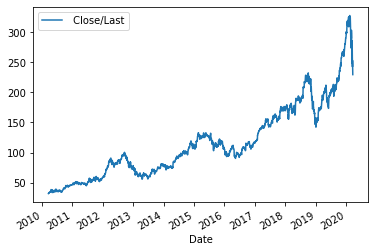

In [42]:
aapl.plot(x='Date',y=' Close/Last')

## SMA Crossover
* Basic indicator that looks at some form of moving average
* Shows the trend (and momentum??) of the asset
* Serves as a common indicator for exit and entry of a position
* https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [43]:
aapl_sma20 = aapl[' Close/Last'].rolling(20).mean()
aapl_sma50 = aapl[' Close/Last'].rolling(50).mean()

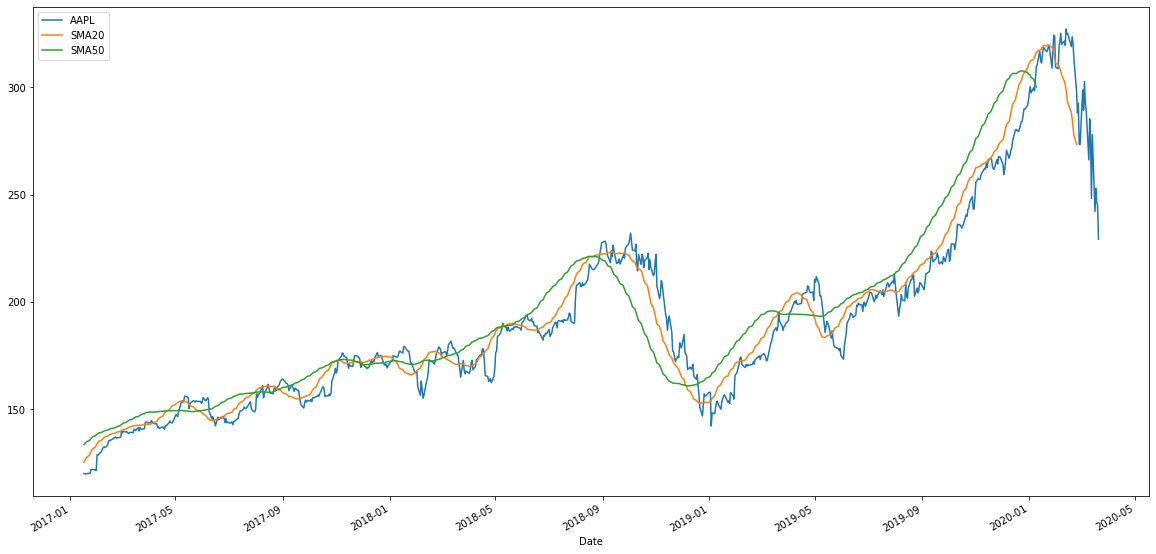

In [53]:
pd.DataFrame({
    'Date': aapl['Date'][:800],
    'AAPL': aapl[' Close/Last'][:800],
    'SMA20': aapl_sma20[:800],
    'SMA50': aapl_sma50[:800]
}).plot(x='Date', figsize=(20,10))

In [57]:
aapl_sma20.shape

(2518,)

In [58]:
aapl_sma50.shape

(2518,)

In [59]:
aapl.shape

(2518, 6)

In [60]:
aapl[:5]

,Date,Close/Last,Volume,Open,High,Low
0,2020-03-20,229.24,100423300,$247.18,$251.83,$228
1,2020-03-19,244.78,67964260,$247.385,$252.84,$242.61
2,2020-03-18,246.67,75058410,$239.77,$250,$237.12
3,2020-03-17,252.86,81013970,$247.51,$257.61,$238.4
4,2020-03-16,242.21,80605870,$241.95,$259.08,$240


## Fixing the SMA lines for the dates near the end
* Since rolling average starts from the start of the df, I need to actually sort the values before rolling

In [21]:
aapl.sort_values(by='Date')

,Close/Last,Volume,Open,High,Low
Date,,,,,
2010-03-22,$32.1071,113828294,$31.4957,$32.2857,$31.45
2010-03-23,$32.6228,150384825,$32.2343,$32.6828,$32.0143
2010-03-24,$32.7671,149419805,$32.52,$32.8857,$32.5014
2010-03-25,$32.3786,135463131,$32.9886,$32.9957,$32.3214
2010-03-26,$32.9857,159986658,$32.7071,$33.1357,$32.65
...,...,...,...,...,...
2020-03-16,$242.21,80605870,$241.95,$259.08,$240
2020-03-17,$252.86,81013970,$247.51,$257.61,$238.4
2020-03-18,$246.67,75058410,$239.77,$250,$237.12


In [22]:
aapl = aapl.sort_values(by='Date')
aapl_sma20 = aapl[' Close/Last'].rolling(20).mean()
aapl_sma50 = aapl[' Close/Last'].rolling(50).mean()

DataError: No numeric types to aggregate

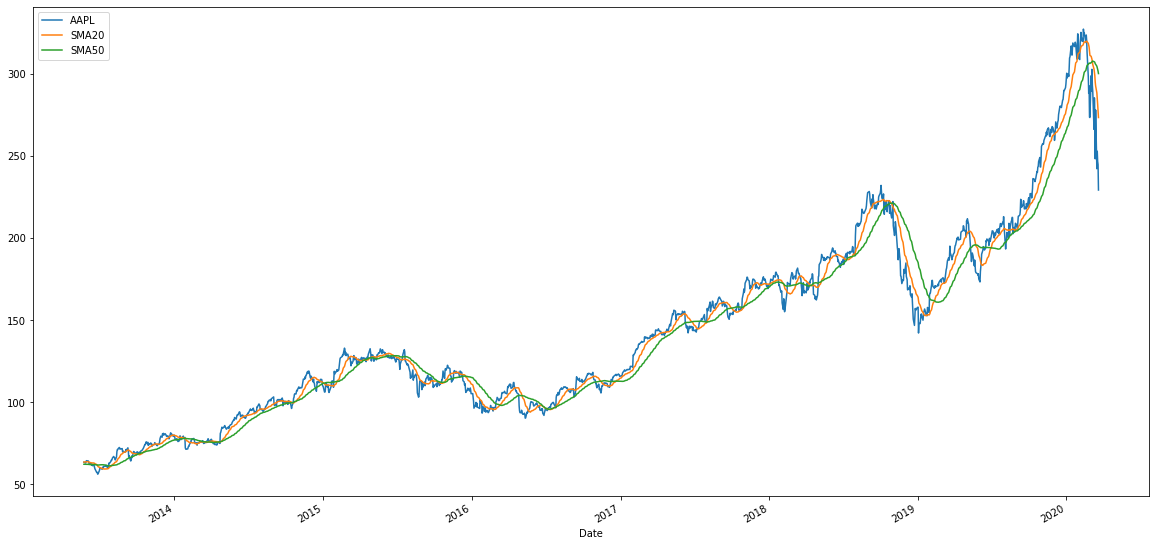

In [10]:
pd.DataFrame({
    'Date': aapl['Date'][800:],
    'AAPL': aapl[' Close/Last'][800:],
    'SMA20': aapl_sma20[800:],
    'SMA50': aapl_sma50[800:]
}).plot(x='Date', figsize=(20,10))

## Candlestick Charts with MAs
* Displyed using the mplfinance library (formerly matplotlib.finance before it was deprecated from the main library)

In [25]:
# mplfinance expects the index to be a datetimeindex
# this is fixed in the data import now
# aapl.index = aapl['Date']

In [43]:
# make column naming consistent
aapl = aapl.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open':'Open', ' High':'High', ' Low':'Low'})

In [44]:
# Convert $xx.xx string to float
aapl['Close'] = aapl['Close'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))
aapl['Open'] = aapl['Open'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))
aapl['High'] = aapl['High'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))
aapl['Low'] = aapl['Low'].map(lambda v: v if type(v)== float else float(v.strip()[1:]))

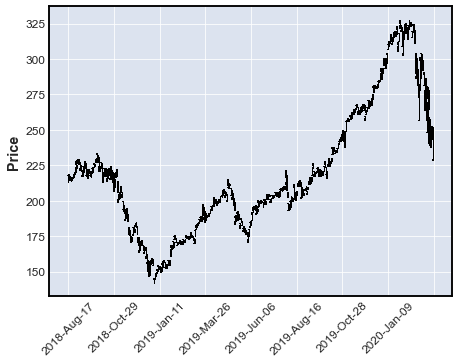

In [53]:
mplfinance.plot(aapl[-400:],type='candle')

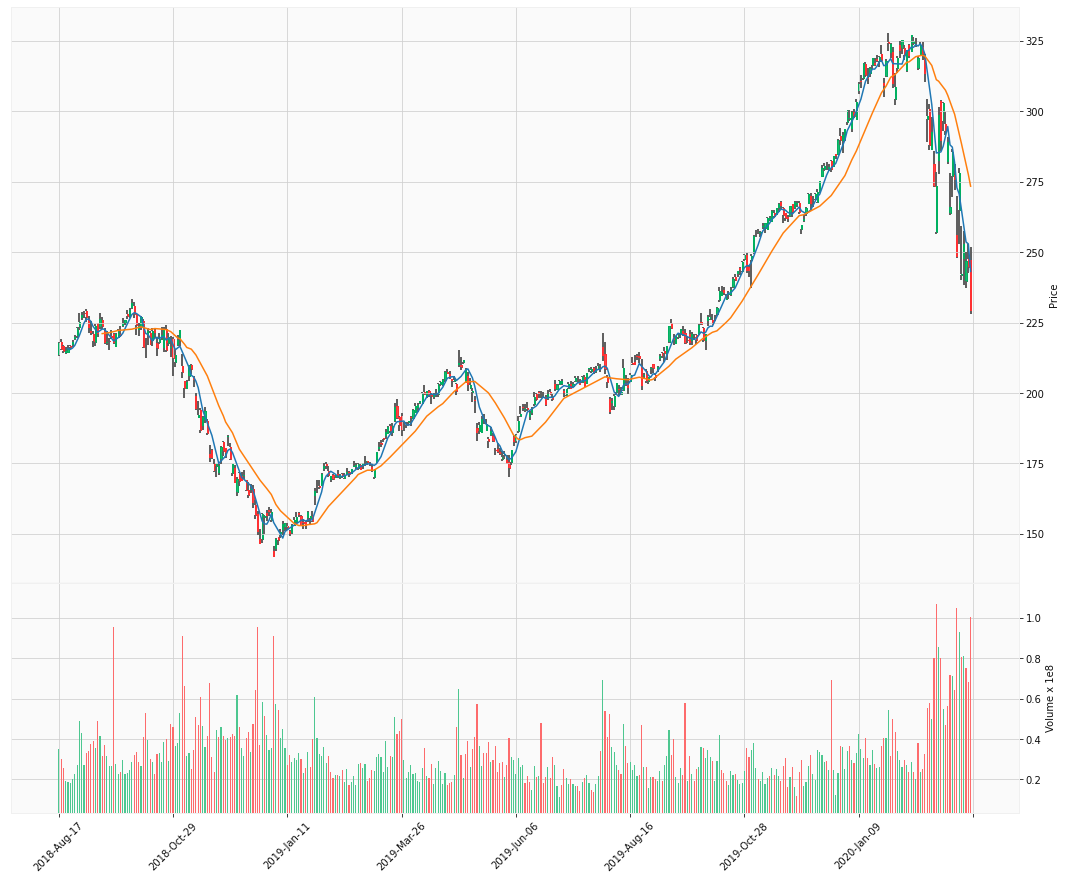

In [76]:
# https://github.com/matplotlib/mplfinance/blob/master/examples/customization_and_styles.ipynb

mc = mplfinance.make_marketcolors(up='g',down='r')

# First we set the kwargs that we will use for all of these examples:
kwargs = dict(type='candle',marketcolors=mc,mav=(5,20),volume=True,figratio=(20,16),figscale=1)

mplfinance.plot(aapl[-400:],**kwargs,style='yahoo')

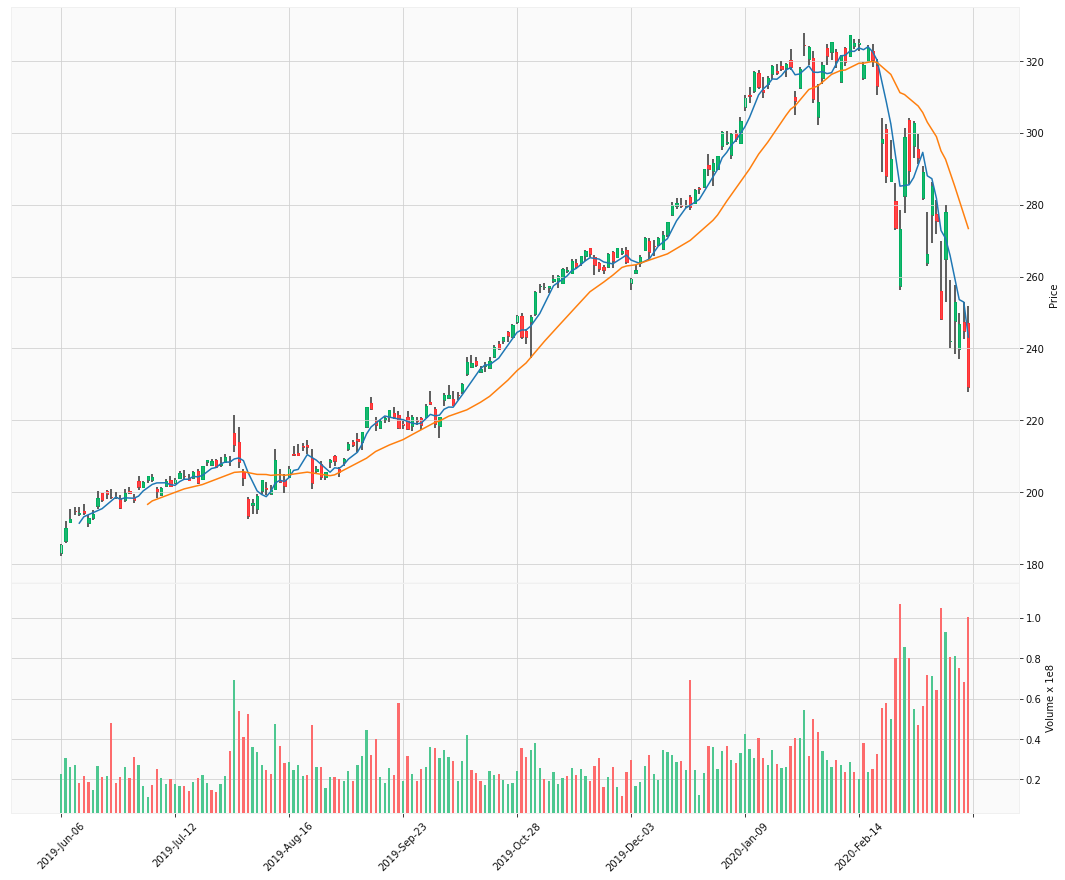

In [81]:
# the limit to it looking good is really ~200 days, unless I'm to increase the resolution
mplfinance.plot(aapl[-200:],**kwargs,style='yahoo')